<a href="https://www.kaggle.com/code/martaseidler/jobs-and-salaries-in-data-science?scriptVersionId=161190312" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Load libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/jobs-in-data/jobs_in_data.csv')
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


## A quick look at the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
data.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>, <Axes: >]],
      dtype=object)

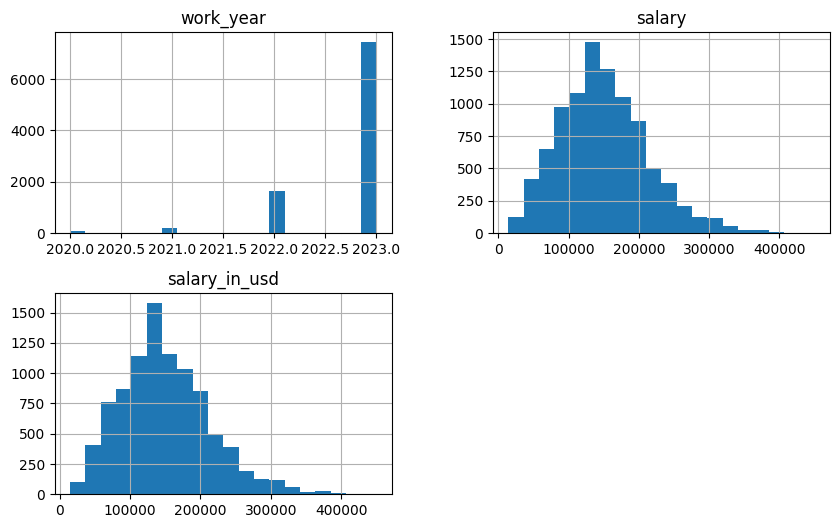

In [5]:
data.hist(figsize=(10,6), bins=20)

In [6]:
entry_level_2020 = data.loc[(data['experience_level']=='Entry-level') & (data['work_year']==2020)]
entry_level_2020.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
2086,2020,Azure Data Engineer,Data Engineering,USD,100000,100000,Mauritius,Entry-level,Full-time,In-person,Mauritius,S
2289,2020,Staff Data Analyst,Data Analysis,CAD,60000,44753,Canada,Entry-level,Contract,Hybrid,Canada,L
4592,2020,Data Analyst,Data Analysis,EUR,42000,47899,Germany,Entry-level,Full-time,In-person,Germany,L
8783,2020,Data Analyst,Data Analysis,EUR,20000,22809,Portugal,Entry-level,Full-time,Remote,Portugal,M
8808,2020,Data Scientist,Data Science and Research,EUR,43200,49268,Germany,Entry-level,Full-time,In-person,Germany,S


In [7]:
entry_level_2023 = data.loc[(data['experience_level']=='Entry-level') & (data['work_year']==2023)]
entry_level_2023.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
15,2023,Data Analyst,Data Analysis,USD,95000,95000,United States,Entry-level,Full-time,In-person,United States,M
16,2023,Data Analyst,Data Analysis,USD,75000,75000,United States,Entry-level,Full-time,In-person,United States,M
53,2023,Research Analyst,Data Science and Research,USD,72000,72000,United States,Entry-level,Full-time,Remote,United States,M
54,2023,Research Analyst,Data Science and Research,USD,64000,64000,United States,Entry-level,Full-time,Remote,United States,M
63,2023,Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Full-time,In-person,United States,M


In [8]:
data['experience_level'].value_counts()

experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64

In [9]:
senior_level_2020 = data.loc[(data['experience_level']=='Senior') & (data['work_year']==2020)]
senior_level_2020.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
4115,2020,Staff Data Scientist,Data Science and Research,USD,164000,164000,United States,Senior,Full-time,Hybrid,United States,M
9063,2020,Machine Learning Manager,Machine Learning and AI,CAD,157000,117104,Canada,Senior,Full-time,Hybrid,Canada,L
9152,2020,Data Scientist,Data Science and Research,EUR,60000,68428,Greece,Senior,Full-time,Remote,United States,L
9211,2020,Data Engineer,Data Engineering,USD,188000,188000,United States,Senior,Full-time,Remote,United States,L
9232,2020,Machine Learning Scientist,Machine Learning and AI,USD,260000,260000,Japan,Senior,Full-time,In-person,Japan,S


In [10]:
senior_level_2023 = data.loc[(data['experience_level']=='Senior') & (data['work_year']==2023)]
senior_level_2023.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M


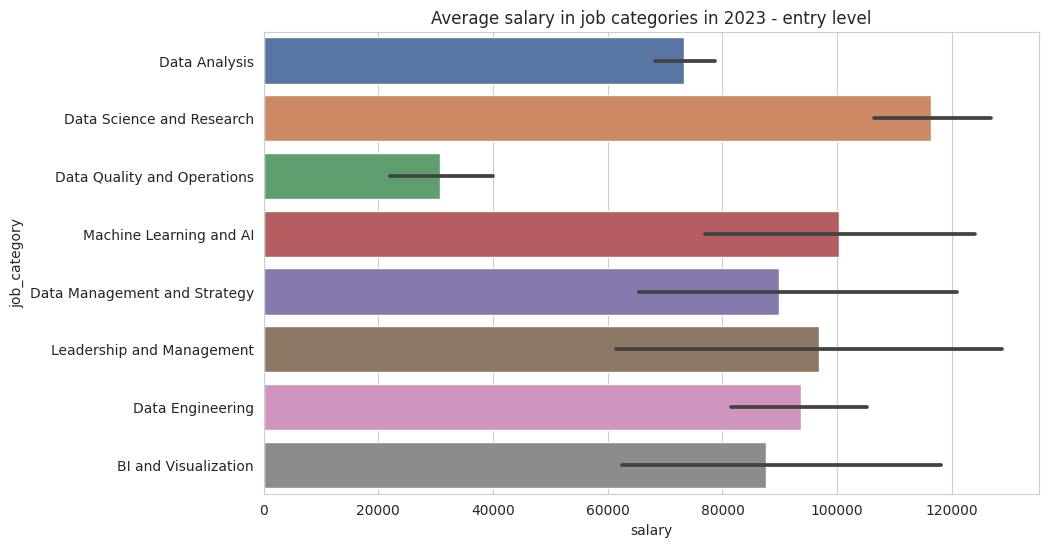

In [11]:
sns.set_style("whitegrid")
sns.set_palette("deep")
plt.figure(figsize=(10,6))
sns.barplot(y=entry_level_2023['job_category'], x=entry_level_2023['salary'])
plt.title("Average salary in job categories in 2023 - entry level")
plt.show()

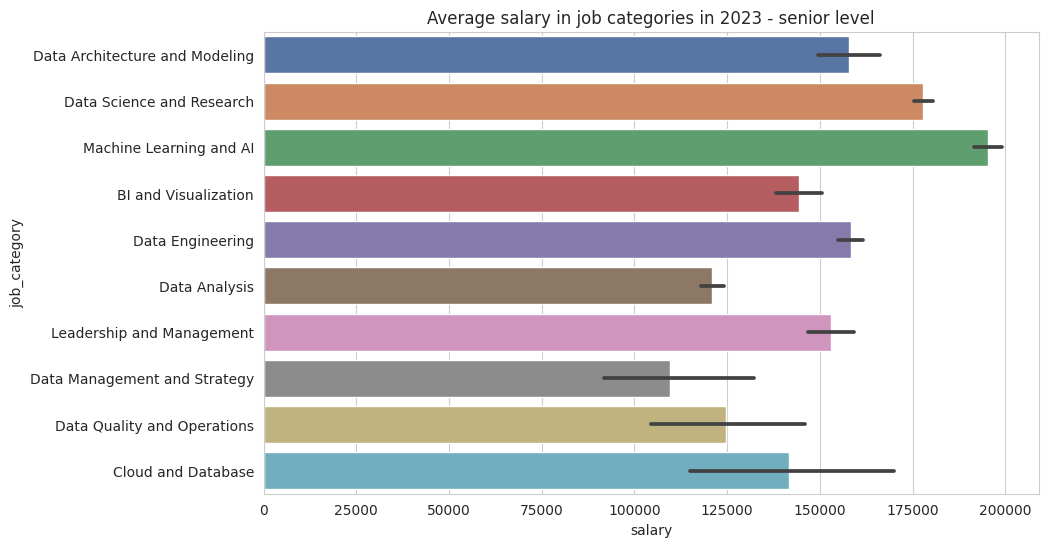

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(y=senior_level_2023['job_category'], x=senior_level_2023['salary'])
plt.title("Average salary in job categories in 2023 - senior level")
plt.show()

In [13]:
mid_level_2023 = data.loc[(data['experience_level']=='Mid-level') & (data['work_year']==2023)]
executive_level_2023 = data.loc[(data['experience_level']=='Executive') & (data['work_year']==2023)]

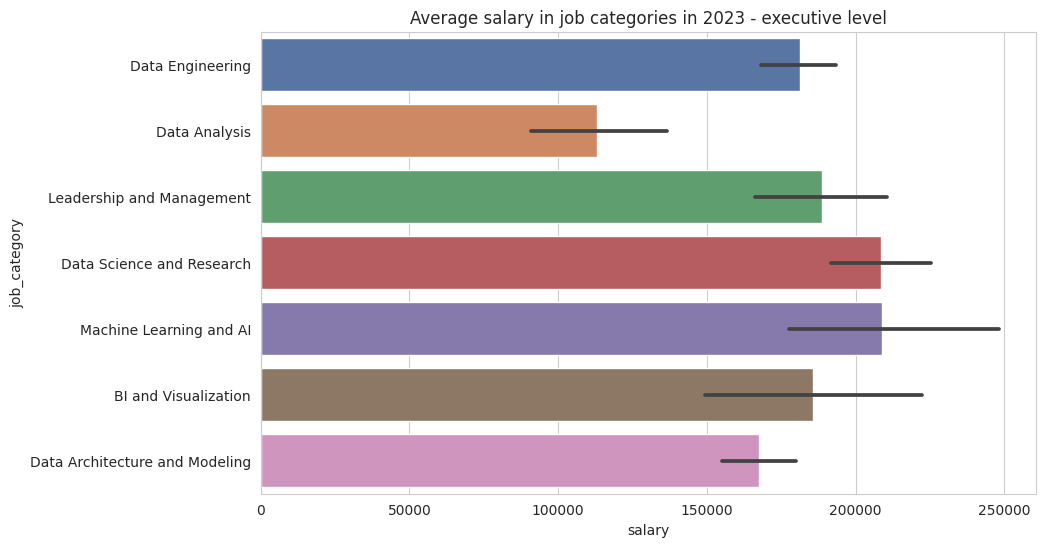

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(y=executive_level_2023['job_category'], x=executive_level_2023['salary'])
plt.title("Average salary in job categories in 2023 - executive level")
plt.show()

In [15]:
entry_level_2023['work_setting'].unique()

array(['In-person', 'Remote', 'Hybrid'], dtype=object)

In [16]:
entry_level_2023['work_setting'].value_counts()

work_setting
In-person    196
Remote       108
Hybrid        20
Name: count, dtype: int64

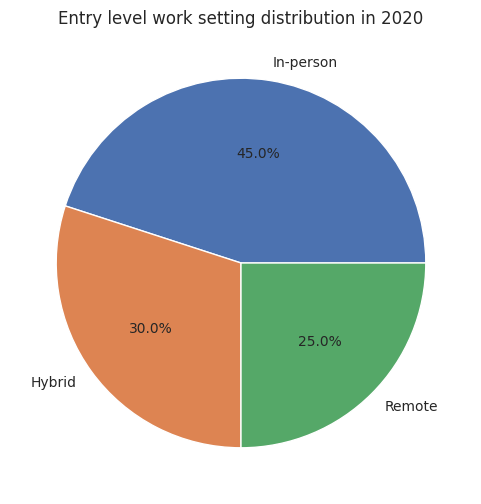

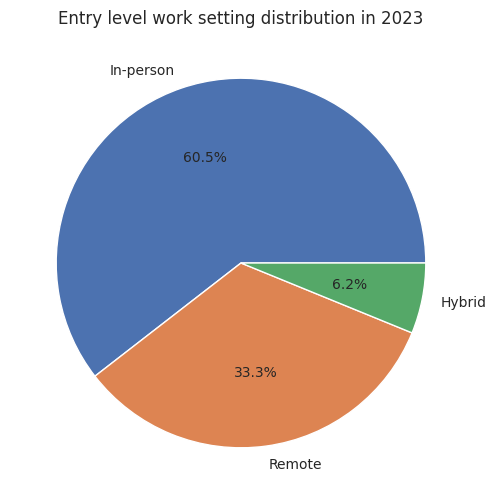

In [17]:
plt.figure(figsize=(6,6))
plt.pie(entry_level_2020['work_setting'].value_counts(),
        labels=entry_level_2020['work_setting'].unique(),
       autopct='%1.1f%%')
plt.title("Entry level work setting distribution in 2020")

plt.figure(figsize=(6,6))
plt.pie(entry_level_2023['work_setting'].value_counts(),
        labels=entry_level_2023['work_setting'].unique(),
       autopct='%1.1f%%')
plt.title("Entry level work setting distribution in 2023")

plt.show()

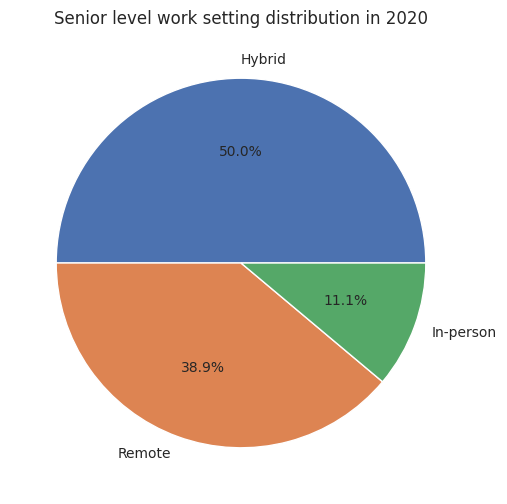

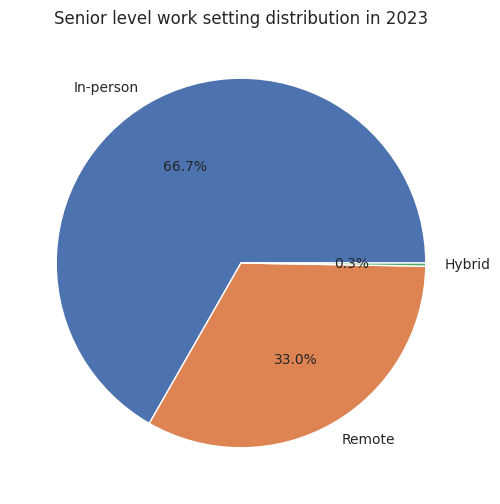

In [18]:
plt.figure(figsize=(6,6))
plt.pie(senior_level_2020['work_setting'].value_counts(),
        labels=senior_level_2020['work_setting'].unique(),
       autopct='%1.1f%%')
plt.title("Senior level work setting distribution in 2020")

plt.figure(figsize=(6,6))
plt.pie(senior_level_2023['work_setting'].value_counts(),
        labels=senior_level_2023['work_setting'].unique(),
       autopct='%1.1f%%')
plt.title("Senior level work setting distribution in 2023")

plt.show()